# Supervised Machine Learning

In this notebook, we'll take a look at supervised machine learning algorithms.

## Classification

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

X sample:
 [[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]]

y sample:
 [1 0 1]



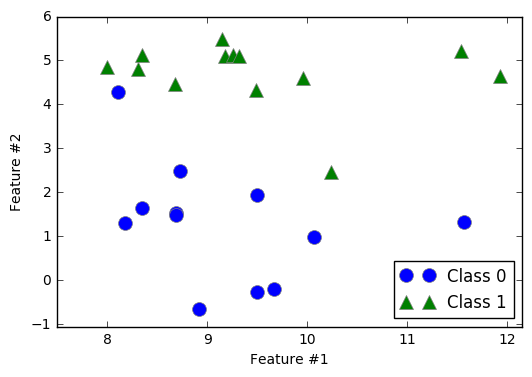

In [23]:
# Data seperation is taken care of with mglearn.datasets
X, y = mglearn.datasets.make_forge()
print("X sample:\n {}\n".format(X[0:3, :]))
print("y sample:\n {}\n".format(y[0:3]))

# Visualize
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Feature #1")
plt.ylabel("Feature #2")

## Regression

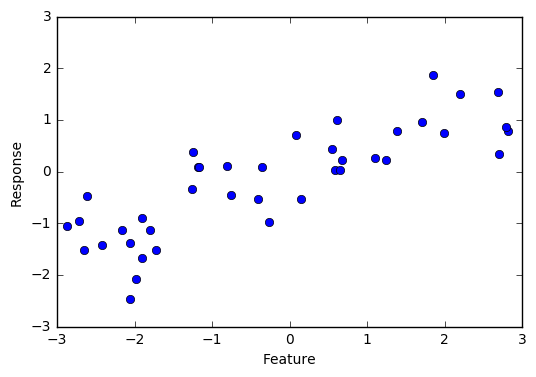

In [30]:
X_2, y_2 = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X_2, y_2, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Response")

## Cancer Dataset

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Inspecting the number of features in the data and responses
print("Shape of cancer dataset: {}\n".format(cancer["data"].shape))
print("cancer.keys(): {}\n".format(cancer.keys()))

Shape of cancer dataset: (569, 30)

cancer.keys(): dict_keys(['target_names', 'target', 'feature_names', 'DESCR', 'data'])


In [62]:
print(cancer["target_names"])
print(np.bincount(cancer["target"]))

['malignant' 'benign']
[212 357]


In [64]:
# We can use zip() on same size target_names and np.bincount(target)
print("{}".format({name: value for name, value in zip(cancer["target_names"], np.bincount(cancer["target"]))}))

{'malignant': 212, 'benign': 357}


In [65]:
print("Feature names: \n{}".format(cancer["feature_names"]))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Boston Dataset

In [77]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Boston Dataset Shape: {}".format(boston["data"].shape))

Boston Dataset Shape: (506, 13)


In [78]:
X_3, y_3 = mglearn.datasets.load_extended_boston()
print("Shape of Ext Boston Dataset: {}".format(X_3.shape))

Shape of Ext Boston Dataset: (506, 104)


# k-Neighbors Classification 

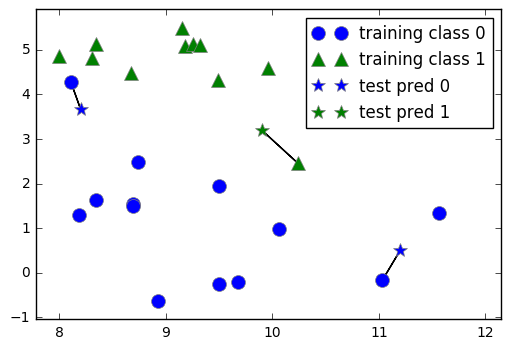

In [83]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

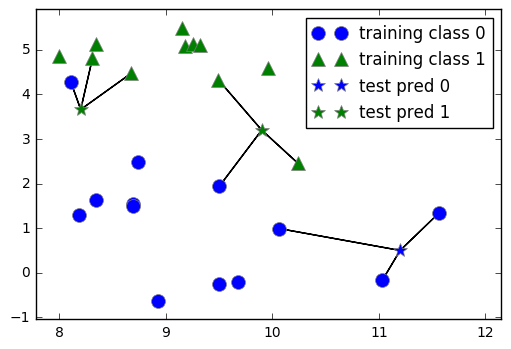

In [84]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [91]:
# Import dataset, train_test_split
X, y = mglearn.datasets.make_forge()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train, y_train)
print("Predictions on test set: \n{}".format(knn_clf.predict(X_test)))

Predictions on test set: 
[1 0 1 0 1 0 0]


In [99]:
# Comparing y_test and our predictions -- knn_clf.score()
print("Test set accuracy: {:.2f}".format(knn_clf.score(X_test, y_test)))

Test set accuracy: 0.86


## Analyzing KNeighbors Classifier

/Users/mohsin/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/mohsin/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


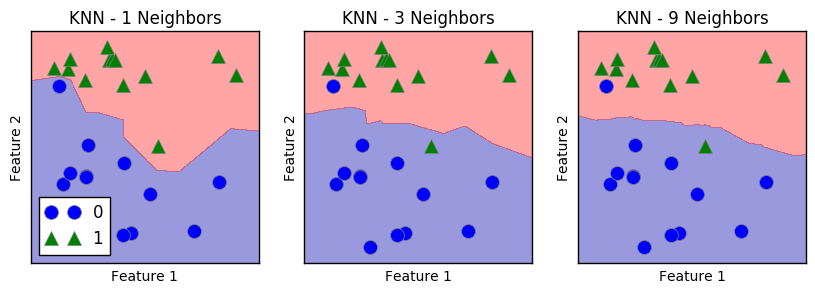

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    axis_knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(axis_knn_clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("KNN - {} Neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
axes[0].legend(loc=3)

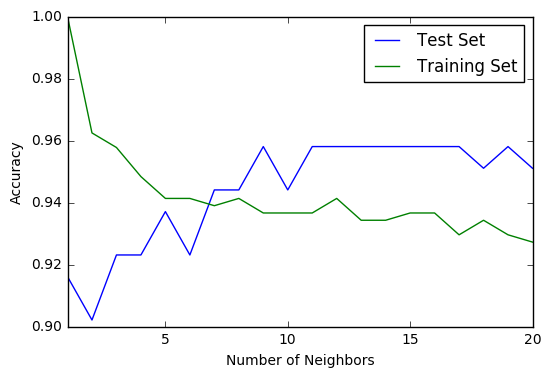

In [182]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], \
                                                    random_state=0)

n_neighbors = [i for i in range(1, 21)]
train_accuracy_list, test_accuracy_list = [], []

for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor)
    knn_clf.fit(X_train, y_train)
    
    # Scores on training set will decrease as neighbors increase (simpler model)
    train_accuracy_list.append(knn_clf.score(X_train, y_train))
    # Scores on test set will increase as neighbors increase (simpler model)
    test_accuracy_list.append(knn_clf.score(X_test, y_test))

plt.plot(n_neighbors, test_accuracy_list, label="Test Set")
plt.plot(n_neighbors, train_accuracy_list, label="Training Set")
plt.xlabel("Number of Neighbors")
plt.xlim(1, 20)
plt.ylabel("Accuracy")
plt.legend()